In [1]:
import numpy as np
from matplotlib import pyplot as plt
from src.model.state_space_model import StateSpace
from src.simulation.simulator import Simulator

A = np.array([[-8, 1], [3, -20.3]])
B = np.array([[1], [2]])
C = np.array([[1, 0]])

test_model = StateSpace(A, B, C)

simulator = Simulator(test_model)
print(test_model.is_controllable())
print(test_model.is_observable())
print(test_model.is_stabilizable())
print(test_model.is_detectible())

True
False
True
True


In [3]:
from src.controller.lqr_solver import get_LQR_gains

L = get_LQR_gains(test_model, np.eye(2), np.array([1]).reshape((1,1)))
L, L.shape

Model not discrete, converting to discrete with sampling time 0.01


(array([[0.07123481, 0.04916482]]), (1, 2))

(2,)
Cannot simulate continuous model, converting to discrete.
Plotting


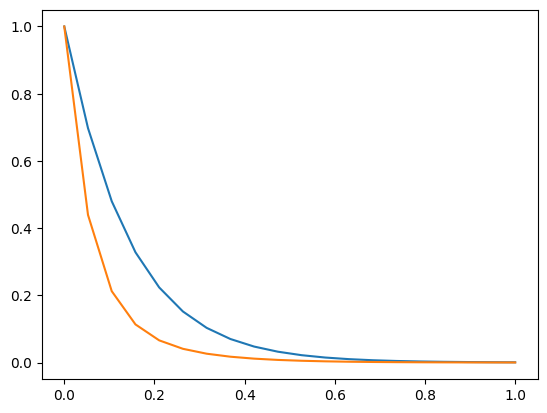

In [4]:
initial_state = np.array([1, 1])

states, output, t = simulator.simulate(initial_state, 1)
print("Plotting")
plt.plot(t, states[0,:])
plt.plot(t, states[1,:])
plt.show()
